In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from datetime import datetime
data = pd.read_csv("new_fedx.csv")
data.set_index('date')

temperature  Rhumidity  Pressure
date                                                       
2021-10-21T06:45:17+02:00        24.32      68.25     18.12
2021-10-21T06:45:38+02:00        24.01      69.00     17.98
2021-10-21T06:46:00+02:00        24.21      65.44     17.35
2021-10-21T06:46:21+02:00        23.84      68.19     17.63
2021-10-21T06:46:42+02:00        22.73      75.06     18.10
...                                ...        ...       ...
2022-12-21T12:06:44+01:00        31.12      68.25     24.60
2022-12-21T12:07:58+01:00        30.92      68.69     24.52
2022-12-21T12:09:11+01:00        30.12      73.12     24.80
2022-12-21T12:10:25+01:00        28.90      80.31     25.19
2022-12-21T12:11:38+01:00        27.20      88.88     25.23

[2059 rows x 3 columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2059 non-null   float64
 1   Rhumidity    2059 non-null   float64
 2   Pressure     2059 non-null   float64
 3   date         2059 non-null   object 
dtypes: float64(3), object(1)
memory usage: 64.5+ KB


In [3]:
data.describe()

temperature    Rhumidity     Pressure
count  2059.000000  2059.000000  2059.000000
mean     26.469573    81.828713    22.838650
std       2.677332    14.336676     2.478783
min      16.920000    37.810000    12.850000
25%      24.660000    71.410000    21.875000
50%      25.920000    85.620000    23.870000
75%      28.555000    94.750000    24.490000
max      33.300000   100.000000    25.830000

In [4]:
from datetime import datetime

data['date'] = pd.to_datetime(data['date'])

In [5]:
data.set_index('date', inplace = True)

In [6]:
data

temperature  Rhumidity  Pressure
date                                                       
2021-10-21 06:45:17+02:00        24.32      68.25     18.12
2021-10-21 06:45:38+02:00        24.01      69.00     17.98
2021-10-21 06:46:00+02:00        24.21      65.44     17.35
2021-10-21 06:46:21+02:00        23.84      68.19     17.63
2021-10-21 06:46:42+02:00        22.73      75.06     18.10
...                                ...        ...       ...
2022-12-21 12:06:44+01:00        31.12      68.25     24.60
2022-12-21 12:07:58+01:00        30.92      68.69     24.52
2022-12-21 12:09:11+01:00        30.12      73.12     24.80
2022-12-21 12:10:25+01:00        28.90      80.31     25.19
2022-12-21 12:11:38+01:00        27.20      88.88     25.23

[2059 rows x 3 columns]

In [7]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, column, timestamp, title):
    '''
    df: dataframe, the dataset.
    column: str, name of column you want to plot
    title: str, title of the plot
    timestamp: str, column of the time for the time series data
    '''
    fig = px.line(title=title)
    for i in df[[column]]:
        fig.add_scatter(x=timestamp, y=df[i], name=i)
    fig.show()
              
interactive_plot(data, 'Pressure', data.index, 'Pressure') 

In [8]:
interactive_plot(data, 'temperature', data.index, 'temperature') 

In [9]:
interactive_plot(data, 'Rhumidity', data.index, 'Rhumidity') 

   # EDA

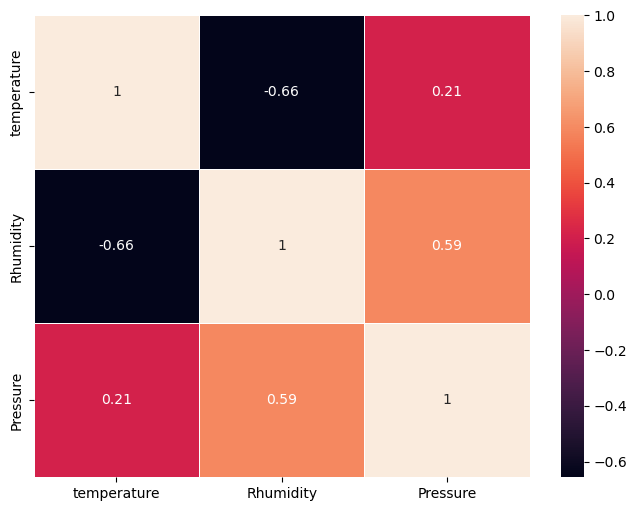

In [10]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(8,6))  # Sample figsize in inches
sns.heatmap(data.corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

    from the above:
        Rhumidity and pressure tends to have a stronger coleration compared to temperature

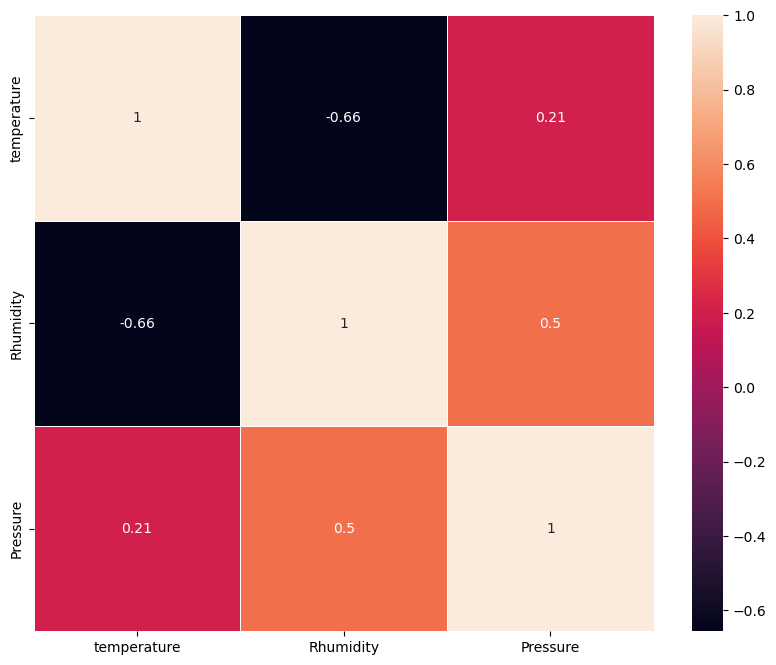

In [11]:
# spearman's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(10,8))  # Sample figsize in inches
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.5, ax=ax);

    from the above:
        presure_hpa and temperaure_c has a strong correlation with dewpoint_c by 88% and 78% respectively

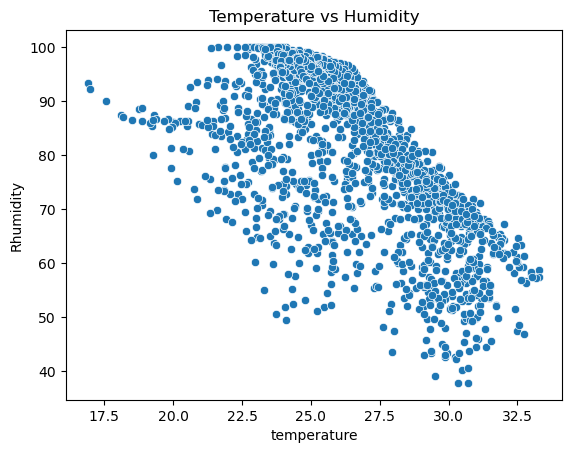

In [12]:
sns.scatterplot(x='temperature', y='Rhumidity', data=data)
plt.title('Temperature vs Humidity')
plt.show()


   # BUILDING MODEL TO PREDICT TEMPERATURE

standardizing the dataset

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Mean of each column", scaler.mean_)
print("Variance of each column", scaler.var_)
scaled_data

Mean of each column [26.46957261 81.82871297 22.83864983]
Variance of each column [  7.16462313 205.44046707   6.14138273]


array([[-0.80307377, -0.94736124, -1.9040777 ],
       [-0.91888883, -0.89503515, -1.96057075],
       [-0.84416944, -1.14340965, -2.21478943],
       ...,
       [ 1.36378855, -0.60759051,  0.7914474 ],
       [ 0.90800027, -0.10595774,  0.94882087],
       [ 0.27288545,  0.49195502,  0.96496174]])

-----------------------------------

    Remember, you can't use shuffle the data when splitting it to the train and test set because it is a time series data.
    
-------------------------------------

In [14]:
# Create Matrix of Features and target variable without scaling**
X = scaled_data[:, 1:]
y = scaled_data[:, 0]
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')
print("--------------------------------------------------")
print("Shape of the Matrix of features", X.shape, sep='\n')
print("Shape of the target variable", y.shape, sep='\n')

Matrix of features
[[-0.94736124 -1.9040777 ]
 [-0.89503515 -1.96057075]
 [-1.14340965 -2.21478943]
 ...
 [-0.60759051  0.7914474 ]
 [-0.10595774  0.94882087]
 [ 0.49195502  0.96496174]]
--------------------------------------------------
Target Variable
[-0.80307377 -0.91888883 -0.84416944 ...  1.36378855  0.90800027
  0.27288545]
--------------------------------------------------
Shape of the Matrix of features
(2059, 2)
Shape of the target variable
(2059,)


In [15]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  shuffle=False)

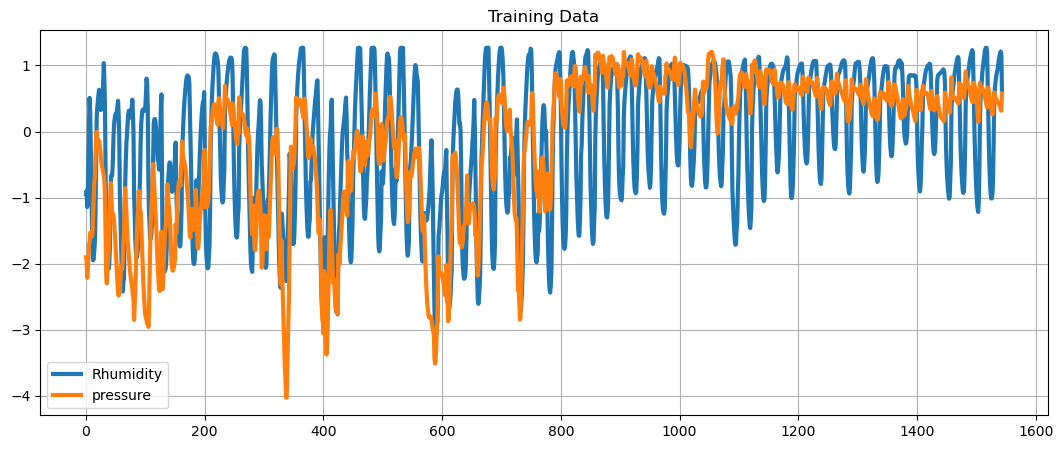

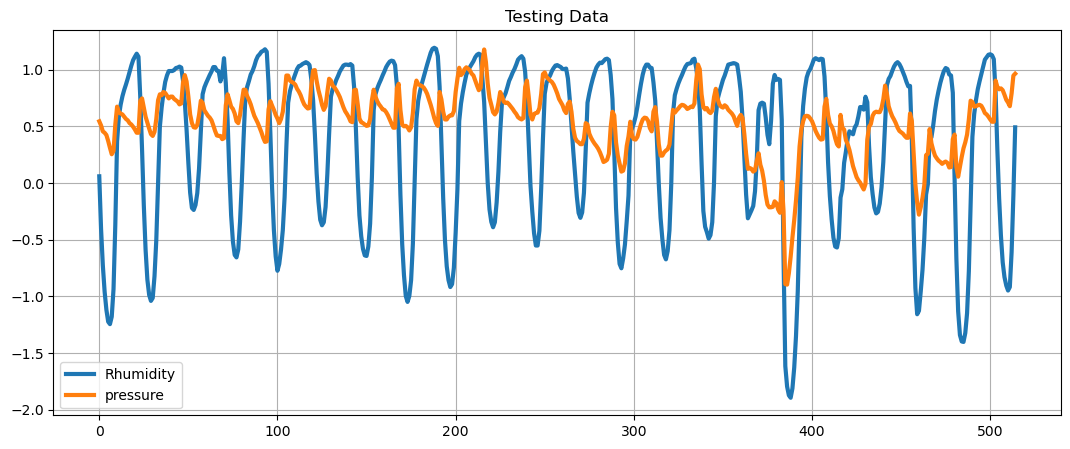

In [16]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize=(13, 5))
    plt.plot(data, linewidth=3)
    plt.title(title)
    plt.legend(['Rhumidity', 'pressure'])
    plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_val, "Testing Data")

# RIDGE REGRESSION

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# fit model to training data
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_1 = ridge_model.predict(X_val)
print("R Squared on Validation Set: ", ridge_model.score(X_val, y_val))
print("RMSE of Ridge Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_1)))

R Squared on Validation Set:  0.9847542573259057
RMSE of Ridge Regressor:  0.09263244433501092


In [18]:
from math import sqrt

# Make Predictions on the entire dataset
y_pred = ridge_model.predict(X)
print("Model Prediction on entire dataset", y_pred)


# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, 0]
print("Original y", original_y)

# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[0])) + scaler.mean_[0]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('ridge_regression.csv', index = True)
print(df_prediction.head(15))

# Function to plot interactive plots using Plotly Express
def interactive_plot2(data, title):
    fig = px.line(title=title)
    for i in data.columns:
        fig.add_scatter(x=data.index, y=data[i], name=i)
        fig.show()

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions Temperature (Ridge)")

Model Prediction on entire dataset [-0.61900917 -0.73539538 -0.66926859 ...  1.47625506  1.01121304
  0.29730832]
Original y [24.32 24.01 24.21 ... 30.12 28.9  27.2 ]
Unstandardized y_pred [24.81268228 24.5011535  24.67815386 ... 30.42103701 29.1762677
 27.26537225]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   24.32   24.812682
2021-10-21 06:45:38+02:00   24.01   24.501154
2021-10-21 06:46:00+02:00   24.21   24.678154
2021-10-21 06:46:21+02:00   23.84   24.333621
2021-10-21 06:46:42+02:00   22.73   23.242150
2021-10-21 06:47:03+02:00   21.42   21.736892
2021-10-21 06:47:24+02:00   20.52   20.604243
2021-10-21 06:47:46+02:00   21.46   21.649817
2021-10-21 06:48:07+02:00   22.85   23.276886
2021-10-21 06:48:28+02:00   24.86   25.315275
2021-10-21 06:49:51+02:00   26.76   27.006281
2021-10-21 06:50:12+02:00   28.83   28.647772
2021-10-21 06:51:17+02:00   30.14   29.733384
2021-10-21 06:52:13+02:00   30.65   30.2589

# Lassor Regressor

In [19]:
from sklearn.linear_model import Lasso

# fit model to training data
lasso_model = Lasso(alpha=0.0005)
lasso_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_2 = lasso_model.predict(X_val)
print("R Squared Lasso Regressor: ", lasso_model.score(X_val, y_val))
print("RMSE of Lasso Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_2)))

R Squared Lasso Regressor:  0.9848150263844968
RMSE of Lasso Regressor:  0.09244764497148104


In [20]:
# Make Predictions on the entire dataset
y_pred = lasso_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, 0]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[0])) + scaler.mean_[0]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
df_prediction.to_csv('lasso_temp.csv', index = True)
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions Temperature (Lasso)")

Model Prediction on entire dataset [-0.61866125 -0.73500834 -0.66887471 ...  1.47572837  1.01080378
  0.29710221]
Original y [24.32 24.01 24.21 ... 30.12 28.9  27.2 ]
Unstandardized y_pred [24.81361356 24.50218949 24.67920813 ... 30.41962723 29.17517224
 27.26482056]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   24.32   24.813614
2021-10-21 06:45:38+02:00   24.01   24.502189
2021-10-21 06:46:00+02:00   24.21   24.679208
2021-10-21 06:46:21+02:00   23.84   24.334743
2021-10-21 06:46:42+02:00   22.73   23.243534
2021-10-21 06:47:03+02:00   21.42   21.738653
2021-10-21 06:47:24+02:00   20.52   20.606323
2021-10-21 06:47:46+02:00   21.46   21.651554
2021-10-21 06:48:07+02:00   22.85   23.278164
2021-10-21 06:48:28+02:00   24.86   25.315974
2021-10-21 06:49:51+02:00   26.76   27.006498
2021-10-21 06:50:12+02:00   28.83   28.647505
2021-10-21 06:51:17+02:00   30.14   29.732724
2021-10-21 06:52:13+02:00   30.65   30.258

# DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeRegressor

# fit model to training data
dt_model = DecisionTreeRegressor(max_leaf_nodes=50,
                                 random_state=1)
dt_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_4 = dt_model.predict(X_val)
print("R Squared Decision Tree Regressor: ", dt_model.score(X_val, y_val))
print("RMSE of Decision Tree Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_4)))

R Squared Decision Tree Regressor:  0.9557523531268692
RMSE of Decision Tree Regressor:  0.15780978249812208


In [22]:
# Make Predictions on the entire dataset
y_pred = dt_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, 0]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[0])) + scaler.mean_[0]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('dt_predicted.csv')
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions Temperature (Decision Tree)")

Model Prediction on entire dataset [-1.26882464 -1.26882464 -0.57979466 ...  1.45202859  0.71301824
  0.10476682]
Original y [24.32 24.01 24.21 ... 30.12 28.9  27.2 ]
Unstandardized y_pred [23.07333333 23.07333333 24.91764706 ... 30.35619048 28.37809524
 26.75      ]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   24.32   23.073333
2021-10-21 06:45:38+02:00   24.01   23.073333
2021-10-21 06:46:00+02:00   24.21   24.917647
2021-10-21 06:46:21+02:00   23.84   23.073333
2021-10-21 06:46:42+02:00   22.73   23.073333
2021-10-21 06:47:03+02:00   21.42   21.706000
2021-10-21 06:47:24+02:00   20.52   21.706000
2021-10-21 06:47:46+02:00   21.46   21.706000
2021-10-21 06:48:07+02:00   22.85   23.870000
2021-10-21 06:48:28+02:00   24.86   24.929524
2021-10-21 06:49:51+02:00   26.76   26.066538
2021-10-21 06:50:12+02:00   28.83   29.078500
2021-10-21 06:51:17+02:00   30.14   29.910149
2021-10-21 06:52:13+02:00   30.65   31.274

# Xgboost Regressor

In [24]:
from xgboost import XGBRegressor

# check for the best number of n_estimators
xgboost_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=-1)
xgboost_model.fit(X_train, y_train,
                  early_stopping_rounds=20,
                  eval_set=[(X_val, y_val)],
                  verbose=True)

[0]	validation_0-rmse:0.79126
[1]	validation_0-rmse:0.71458
[2]	validation_0-rmse:0.64453
[3]	validation_0-rmse:0.58114
[4]	validation_0-rmse:0.52413
[5]	validation_0-rmse:0.47273
[6]	validation_0-rmse:0.42773
[7]	validation_0-rmse:0.38654
[8]	validation_0-rmse:0.34939
[9]	validation_0-rmse:0.31624
[10]	validation_0-rmse:0.28700
[11]	validation_0-rmse:0.26036
[12]	validation_0-rmse:0.23646
[13]	validation_0-rmse:0.21474
[14]	validation_0-rmse:0.19538
[15]	validation_0-rmse:0.17805


/home/c4leb/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[16]	validation_0-rmse:0.16285
[17]	validation_0-rmse:0.14910
[18]	validation_0-rmse:0.13639
[19]	validation_0-rmse:0.12459
[20]	validation_0-rmse:0.11428
[21]	validation_0-rmse:0.10544
[22]	validation_0-rmse:0.09698
[23]	validation_0-rmse:0.08984
[24]	validation_0-rmse:0.08334
[25]	validation_0-rmse:0.07772
[26]	validation_0-rmse:0.07259
[27]	validation_0-rmse:0.06840
[28]	validation_0-rmse:0.06445
[29]	validation_0-rmse:0.06116
[30]	validation_0-rmse:0.05809
[31]	validation_0-rmse:0.05549
[32]	validation_0-rmse:0.05307
[33]	validation_0-rmse:0.05114
[34]	validation_0-rmse:0.04937
[35]	validation_0-rmse:0.04778
[36]	validation_0-rmse:0.04665
[37]	validation_0-rmse:0.04548
[38]	validation_0-rmse:0.04461
[39]	validation_0-rmse:0.04389
[40]	validation_0-rmse:0.04319
[41]	validation_0-rmse:0.04258
[42]	validation_0-rmse:0.04211
[43]	validation_0-rmse:0.04173
[44]	validation_0-rmse:0.04136
[45]	validation_0-rmse:0.04107
[46]	validation_0-rmse:0.04078
[47]	validation_0-rmse:0.04045
[48]	val

[274]	validation_0-rmse:0.03167
[275]	validation_0-rmse:0.03167
[276]	validation_0-rmse:0.03166
[277]	validation_0-rmse:0.03162
[278]	validation_0-rmse:0.03158
[279]	validation_0-rmse:0.03156
[280]	validation_0-rmse:0.03151
[281]	validation_0-rmse:0.03151
[282]	validation_0-rmse:0.03151
[283]	validation_0-rmse:0.03151
[284]	validation_0-rmse:0.03152
[285]	validation_0-rmse:0.03152
[286]	validation_0-rmse:0.03152
[287]	validation_0-rmse:0.03150
[288]	validation_0-rmse:0.03150
[289]	validation_0-rmse:0.03150
[290]	validation_0-rmse:0.03142
[291]	validation_0-rmse:0.03142
[292]	validation_0-rmse:0.03142
[293]	validation_0-rmse:0.03141
[294]	validation_0-rmse:0.03141
[295]	validation_0-rmse:0.03141
[296]	validation_0-rmse:0.03135
[297]	validation_0-rmse:0.03133
[298]	validation_0-rmse:0.03130
[299]	validation_0-rmse:0.03131
[300]	validation_0-rmse:0.03130
[301]	validation_0-rmse:0.03130
[302]	validation_0-rmse:0.03130
[303]	validation_0-rmse:0.03128
[304]	validation_0-rmse:0.03128
[305]	va

[531]	validation_0-rmse:0.02970
[532]	validation_0-rmse:0.02970
[533]	validation_0-rmse:0.02970
[534]	validation_0-rmse:0.02969
[535]	validation_0-rmse:0.02969
[536]	validation_0-rmse:0.02969
[537]	validation_0-rmse:0.02969
[538]	validation_0-rmse:0.02969
[539]	validation_0-rmse:0.02969
[540]	validation_0-rmse:0.02969
[541]	validation_0-rmse:0.02968
[542]	validation_0-rmse:0.02968
[543]	validation_0-rmse:0.02968
[544]	validation_0-rmse:0.02968
[545]	validation_0-rmse:0.02968
[546]	validation_0-rmse:0.02968
[547]	validation_0-rmse:0.02968
[548]	validation_0-rmse:0.02968
[549]	validation_0-rmse:0.02967
[550]	validation_0-rmse:0.02965
[551]	validation_0-rmse:0.02965
[552]	validation_0-rmse:0.02965
[553]	validation_0-rmse:0.02965
[554]	validation_0-rmse:0.02965
[555]	validation_0-rmse:0.02965
[556]	validation_0-rmse:0.02964
[557]	validation_0-rmse:0.02965
[558]	validation_0-rmse:0.02964
[559]	validation_0-rmse:0.02964
[560]	validation_0-rmse:0.02963
[561]	validation_0-rmse:0.02964
[562]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=500, learning_rate=0.1)
xgboost_model_3 = XGBRegressor(n_estimators=500, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)

xgboost_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
x = np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.9984210376445951
RMSE of XGBoost Regressor:  0.02981087472484073


In [32]:
# Make Predictions on the entire dataset
y_pred = xgboost_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, 0]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[0])) + scaler.mean_[0]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('Xgboost_pred.csv')
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions Temperature (XGBoost)")

Model Prediction on entire dataset [-0.8109578  -0.9228009  -0.84387785 ...  1.3438809   0.92977995
  0.28156015]
Original y [24.32 24.01 24.21 ... 30.12 28.9  27.2 ]
Unstandardized y_pred [24.298897 23.999529 24.21078  ... 30.066713 28.958296 27.223219]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   24.32   24.298897
2021-10-21 06:45:38+02:00   24.01   23.999529
2021-10-21 06:46:00+02:00   24.21   24.210779
2021-10-21 06:46:21+02:00   23.84   23.831961
2021-10-21 06:46:42+02:00   22.73   22.729790
2021-10-21 06:47:03+02:00   21.42   21.418798
2021-10-21 06:47:24+02:00   20.52   20.516159
2021-10-21 06:47:46+02:00   21.46   21.462627
2021-10-21 06:48:07+02:00   22.85   22.851046
2021-10-21 06:48:28+02:00   24.86   24.860941
2021-10-21 06:49:51+02:00   26.76   26.785131
2021-10-21 06:50:12+02:00   28.83   28.844318
2021-10-21 06:51:17+02:00   30.14   30.128056
2021-10-21 06:52:13+02:00   30.65   30.652794
2021-10-2

# xgboost model 2

In [33]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model_2 = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)


xgboost_model_2.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model_2.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model_2.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
y = np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.9976109070417263
RMSE of XGBoost Regressor:  0.03666953101862748


# xgboost model 3

In [34]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model_3 = XGBRegressor(n_estimators=800, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)

xgboost_model_3.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model_3.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model_3.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
z = np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.9854804519685413
RMSE of XGBoost Regressor:  0.09039936511351025


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scores(models, r_squared, rmse):
    # Set up the bar plot
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(models))
    bar_width = 0.35

    # Plot the R-squared values
    rects1 = ax.bar(index, r_squared, bar_width, label='R-squared')

    # Plot the RMSE values
    rects2 = ax.bar(index + bar_width, rmse, bar_width, label='RMSE')

    # Set the x-axis labels
    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.set_title('Temperature')
    ax.legend()

    # Add labels to each bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Display the plot
    plt.tight_layout()
    plt.show()


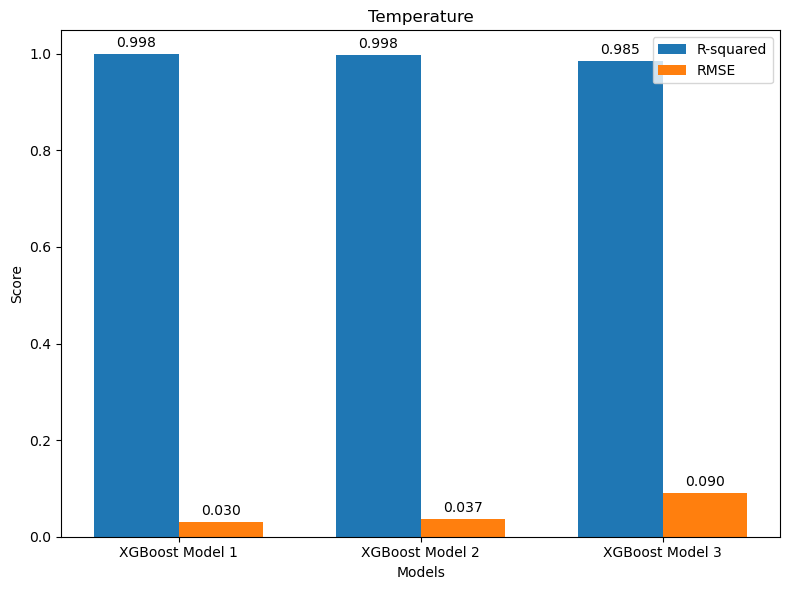

In [38]:
models = ['XGBoost Model 1', 'XGBoost Model 2', 'XGBoost Model 3']
r_squared = [xgboost_model.score(X_val, y_val), xgboost_model_2.score(X_val, y_val), xgboost_model_3.score(X_val, y_val)]
rmse = [x, y, z]
plot_scores(models, r_squared, rmse)
